<a href="https://colab.research.google.com/github/MagicMoleMM/ML/blob/main/TF_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
mapping = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress",
           4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag",
           9: "Ankle boot"}  # датасет содержит 10 классов

def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {mapping[labels[i]]}. Pred: {mapping[predicted_labels[i]]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {mapping[labels[i]]}")

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


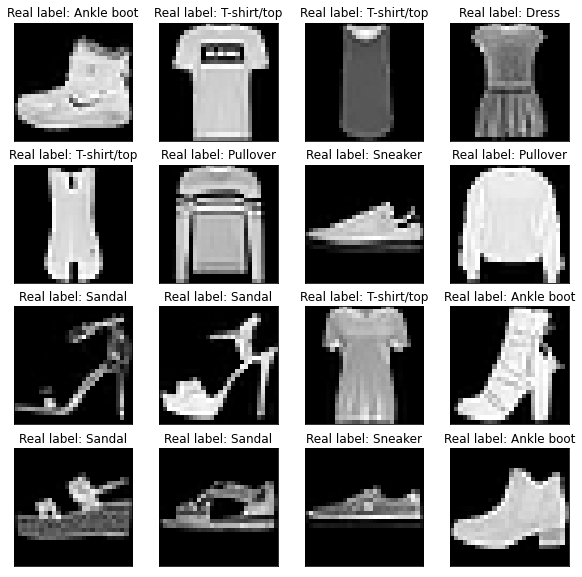

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
print(x_train.shape, x_test.shape)

In [4]:
x_train = x_train[...,None]
x_test = x_test[...,None]
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                                 activation='relu', input_shape=(28, 28, 1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.python.keras import activations
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activations.relu))
model.add(tf.keras.layers.Dense(10, activations.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [7]:
from tensorflow.python.ops import losses
from tensorflow.python.keras.engine.training import optimizers
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
model.fit(x=x_train, y=y_train,
          batch_size=128, epochs=20, 
          validation_data=(x_test,y_test))

Epoch 1/20
469/469 [==============================] - 11s 6ms/step - loss: 0.5060 - accuracy: 0.8192 - val_loss: 0.3727 - val_accuracy: 0.8647
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3201 - accuracy: 0.8860 - val_loss: 0.3178 - val_accuracy: 0.8836
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2803 - accuracy: 0.8986 - val_loss: 0.2890 - val_accuracy: 0.8935
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2490 - accuracy: 0.9094 - val_loss: 0.2689 - val_accuracy: 0.9020
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2269 - accuracy: 0.9170 - val_loss: 0.2558 - val_accuracy: 0.9081
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2090 - accuracy: 0.9229 - val_loss: 0.2471 - val_accuracy: 0.9116
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1926 - accuracy: 0.9299 - val_loss: 0.2398 - val_accuracy: 0.9137
Epoch

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                                 activation='relu', input_shape=(28, 28, 1))) 
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                                 activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activations.relu))
model.add(tf.keras.layers.Dense(10, activations.softmax))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
model.fit(x=x_train, y=y_train,
          batch_size=128, epochs=20, 
          validation_data=(x_test,y_test))

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.4665 - accuracy: 0.8325 - val_loss: 0.3267 - val_accuracy: 0.8825
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2776 - accuracy: 0.8997 - val_loss: 0.2590 - val_accuracy: 0.9092
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2278 - accuracy: 0.9165 - val_loss: 0.2531 - val_accuracy: 0.9073
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1966 - accuracy: 0.9276 - val_loss: 0.2291 - val_accuracy: 0.9177
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1777 - accuracy: 0.9342 - val_loss: 0.2282 - val_accuracy: 0.9172
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1539 - accuracy: 0.9428 - val_loss: 0.2094 - val_accuracy: 0.9255
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1355 - accuracy: 0.9499 - val_loss: 0.2166 - val_accuracy: 0.9269
Epoch

In [33]:
import os
from pathlib import Path
import PIL
import PIL.Image

In [13]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 4s 0us/step


In [18]:
# определим папки с данными
base_dir = Path(zip_dir).parent / "cats_and_dogs_filtered"
train_dir = base_dir / 'train'
validation_dir = base_dir / 'validation'

train_cats_dir = train_dir / 'cats'
train_dogs_dir = train_dir / 'dogs'
validation_cats_dir = validation_dir / 'cats'
validation_dogs_dir = validation_dir / 'dogs'

In [19]:
num_cats_tr = len(list(train_cats_dir.glob("*"))) # .glob("*") создает итератор по всем файлам в директории
num_dogs_tr = len(list(train_dogs_dir.glob("*")))

num_cats_val = len(list(validation_cats_dir.glob("*")))
num_dogs_val = len(list(validation_dogs_dir.glob("*")))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [20]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


(336, 447, 3)
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2210.jpg


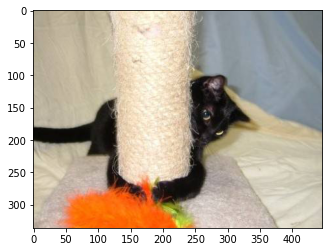

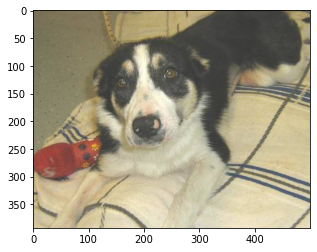

In [35]:
image_path = str(list(validation_cats_dir.glob("*"))[0])
image = plt.imread(image_path)
plt.figure()
plt.imshow(image)
print(image.shape)

image_path = str(list(validation_dogs_dir.glob("*"))[0])
image = plt.imread(image_path)
plt.figure()
plt.imshow(image)
print(image_path)

In [43]:
BATCH_SIZE = 100 # размер батча -- т.е. количество картинок которые мы считываем за раз
                 # во многом зависит от доступной памяти GPU. 
                 # Если ее не хватит (появится такая ошибка) значит нужно уменьшить размер батча или картинки
img_height = 180
img_width = 180

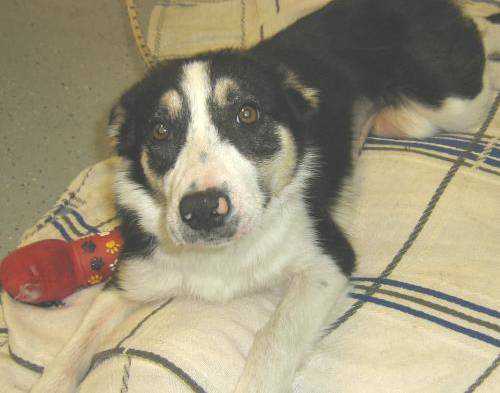

In [37]:
PIL.Image.open(image_path)


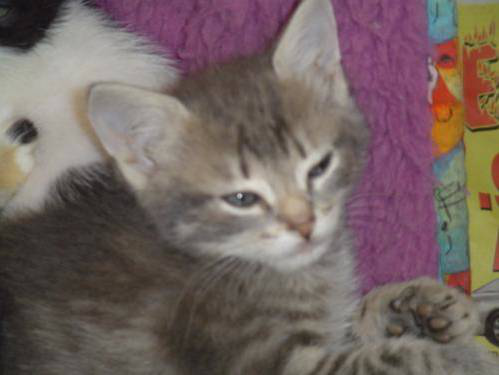

In [41]:
PIL.Image.open(str(list(validation_cats_dir.glob("*"))[1]))

In [44]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


In [45]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

Found 1000 files belonging to 2 classes.
Using 200 files for validation.


In [46]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


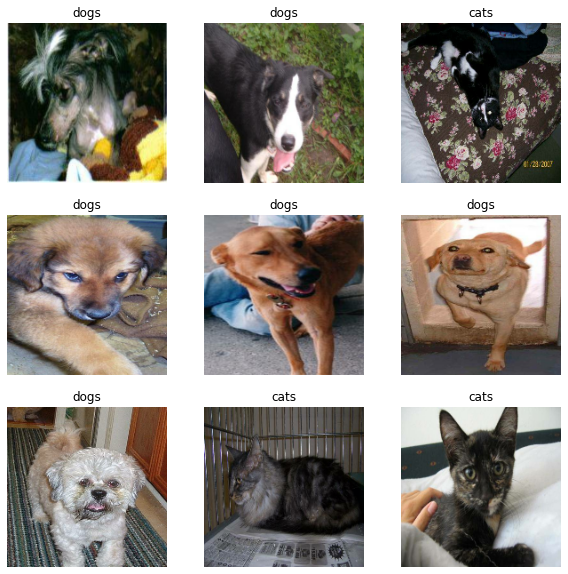

In [47]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [48]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [57]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

In [58]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [59]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
16/16 [==============================] - 2s 119ms/step - loss: 0.9219 - accuracy: 0.4963 - val_loss: 0.6963 - val_accuracy: 0.4350
Epoch 2/30
16/16 [==============================] - 2s 112ms/step - loss: 0.6854 - accuracy: 0.5319 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 3/30
16/16 [==============================] - 2s 112ms/step - loss: 0.6587 - accuracy: 0.6069 - val_loss: 0.6675 - val_accuracy: 0.5700
Epoch 4/30
16/16 [==============================] - 2s 112ms/step - loss: 0.6005 - accuracy: 0.6712 - val_loss: 0.7020 - val_accuracy: 0.6150
Epoch 5/30
16/16 [==============================] - 2s 111ms/step - loss: 0.5463 - accuracy: 0.7181 - val_loss: 0.6664 - val_accuracy: 0.6350
Epoch 6/30
16/16 [==============================] - 2s 111ms/step - loss: 0.4939 - accuracy: 0.7600 - val_loss: 0.5897 - val_accuracy: 0.7350
Epoch 7/30
16/16 [==============================] - 2s 111ms/step - loss: 0.4677 - accuracy: 0.7650 - val_loss: 0.6201 - val_accuracy: 0.7000
Epoch 

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 41, 41, 128)      

In [69]:
model.predict(val_ds)[0]

2/2 [==============================] - 0s 53ms/step


array([0.9758514 , 0.03357957], dtype=float32)

2/2 [==============================] - 0s 48ms/step


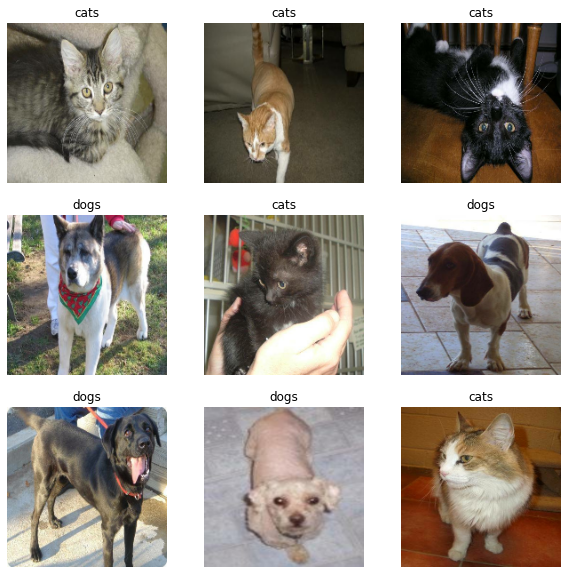

In [73]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(model.predict(val_ds)[i])])
    plt.axis("off")

In [72]:
predicted_labels = np.argmax(model.predict(val_ds)[0])
class_names[np.argmax(model.predict(val_ds)[0])]

2/2 [==============================] - 0s 58ms/step


'cats'